In [ ]:
#Instalando módulo necessária para a análise
!pip install lifelines==0.26.3

In [1]:
#Importando módulos para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
#Configurações para as plotagens
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Configurações do dataframe

#Removendo limite máximo de colunas para vizualização
pd.options.display.max_columns = None

In [36]:
#Importando o dataset
df_info_assinatura = pd.read_csv('Data/CustomerChurn.csv', sep=';')
df_info_cons = pd.read_csv('Data/CustomerChurnInfos.csv', sep=';')

In [39]:
#Fazendo o cruzamento das informações
df = pd.merge(df_info_assinatura, df_info_cons[['Customer ID','Country','State', 'Gender', 'Churn Reason', 'CLTV']], how="left", on=["Customer ID"])

In [40]:
#Checando se o read_csv ocorreu da maneira correta
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Country,State,Gender,Churn Reason,CLTV
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No,United States,California,Female,NaN,3964
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No,United States,California,Male,NaN,3441
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,United States,California,Male,Competitor made better offer,3239
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No,United States,California,Male,NaN,4307
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,United States,California,Female,Moved,2701


<h3>Dataprep</h3><br/><h4>Tratamento dos dados

In [41]:
#Listando todas as colunas
df.columns

Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn',
       'Country', 'State', 'Gender', 'Churn Reason', 'CLTV'],
      dtype='object')

In [42]:
#Renomeando todas as colunas para Português
depara = {
          'Senior Citizen':'Idoso', 
          'Partner':'Possui_parceiro', 
          'Dependents':'Possui_dependentes',
          'Tenure':'Meses_relacionamento',
          'Phone Service':'Possui_telefonia',
          'Multiple Lines':'Multipla_linha_tel',
          'Internet Service':'Provedor_internet',
          'Online Security':'Possui_seguranca_online',
          'Online Backup':'Possui_backup_online',
          'Device Protection':'Possui_seguro_dispositivo',
          'Tech Support':'Usou_suporte_tecnico',
          'Streaming TV':'Assinatura_TV',
          'Streaming Movies':'Assinatura_Filmes',
          'Contract':'Tipo_contrato',
          'Paperless Billing':'Fatura_digital',
          'Payment Method':'Meio_pagamento',
          'Monthly Charges':'Preco_mensal',
          'Total Charges':'Preco_total',
          'Churn':'Churn',
          'Churn Reason':'Motivo do Churn',
          'Gender':'Genero',
          'Country':'Pais',
          'State':'Estado',
         }
df.rename(columns = depara, inplace = True)

In [43]:
#Binarizando variáveis que serão utilizadas
def dummy_var(col):
    df.loc[df[col] == 'Yes', [col]] = 1
    df.loc[df[col] == 'No', [col]] = 0

dummy_var('Idoso')
dummy_var('Churn')

In [44]:
#Checando volumetria do dataframe
df.shape

(7043, 26)

In [45]:
#Convertendo Texto para numéricos

#Troca , para .
df["Preco_mensal"]=df["Preco_mensal"].str.replace(',','.')
df["Preco_total"]=df["Preco_total"].str.replace(',','.')

#Converte para numérico
df['Preco_mensal']=pd.to_numeric(df['Preco_mensal'])
df['Preco_mensal']=pd.to_numeric(df['Preco_mensal'])

<h3>Plots</h3><br/><h4>Visualização dos dados

<AxesSubplot:title={'center':'Histograma do tempo de relacionamento'}, ylabel='Frequency'>

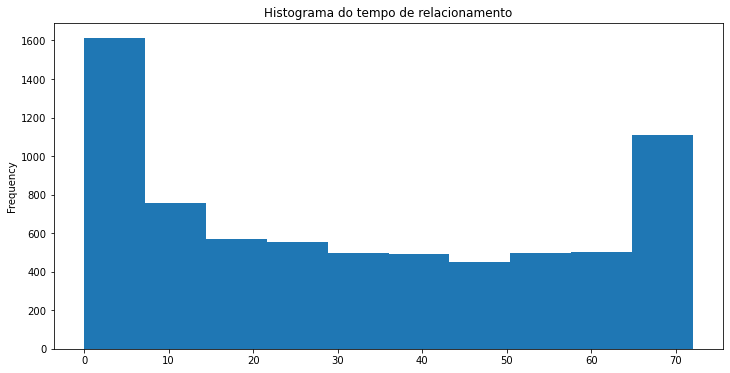

In [46]:
#Histograma do tempo de relacionamento
plt.title('Histograma do tempo de relacionamento')
df['Meses_relacionamento'].plot(kind='hist')

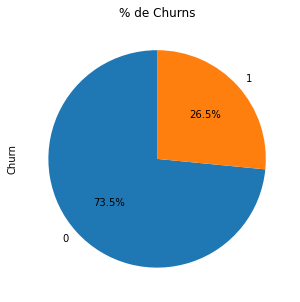

In [47]:
#% de Churns
plt.title('% de Churns')
df_plot = df.groupby(['Churn'])['Churn'].count()
df_plot.plot.pie(y='Churn',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

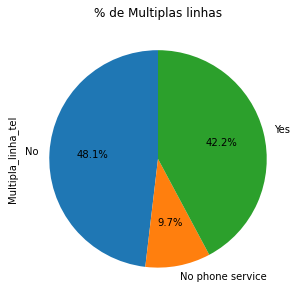

In [48]:
#% de Multiplas linhas
plt.title('% de Multiplas linhas')
df_plot = df.groupby(['Multipla_linha_tel'])['Multipla_linha_tel'].count()
df_plot.plot.pie(y='Multipla_linha_tel',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

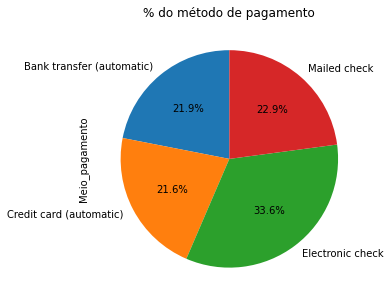

In [49]:
#% do método de pagamento
plt.title('% do método de pagamento')
df_plot = df.groupby(['Meio_pagamento'])['Meio_pagamento'].count()
df_plot.plot.pie(y='Meio_pagamento',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

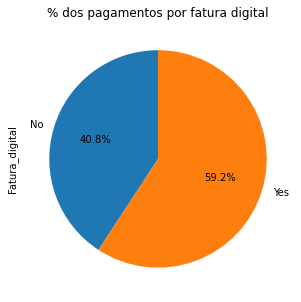

In [50]:
#% dos pagamentos por fatura digital
plt.title('% dos pagamentos por fatura digital')
df_plot = df.groupby(['Fatura_digital'])['Fatura_digital'].count()
df_plot.plot.pie(y='Fatura_digital',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

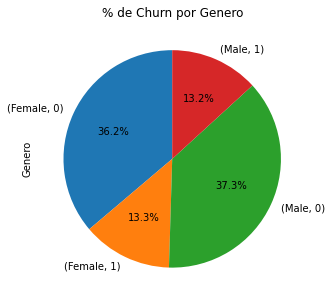

In [54]:
#% de Churn por Genero
plt.title('% de Churn por Genero')
df_plot = df.groupby(['Genero','Churn'])['Genero'].count()
df_plot.plot.pie(y='Genero',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

C:\Users\gabri\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1181: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<AxesSubplot:xlabel='timeline'>

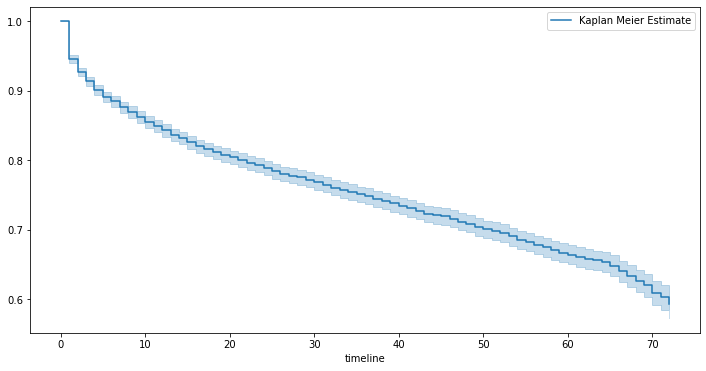

In [23]:
durations = df['Meses_relacionamento'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()